# Capstone Project - The Battle of neighbourhoods (Week-1)
## 🏨 Bed and Breakfast Location in Brooklyn NY, Barclay Center as epicenter
#### Applied Data Science Capstone IBM-Coursera

   ### Table of content
   
   ##### Week - 1
   ✔ Introduction: Business Problem
   
   ✔ Data 
   
         
   ##### Week - 2
  ✔ Methodology and Data Analysis
   
  ✔ Results and Discussion
   
  ✔ Conclusion
   

### Introduction: Business Problem


New York always being a fascinating city with many visitors year-round, making tourism a thriving business. Yet Manhattan is still the center or visitors’ people the cost of hotels in Manhattan are quite expensive.


Brooklyn have become trendy with arts and music scene due to the influence of different cultures specially black communities yet some of them are suffering gentrification with the new investments in infrastructure the proximity to Manhattan and access to subway a cheap means of transport it is ideal place to set trendy Bed and Breakfast turning as an example a Brownstone 4 story home into a good business for locals and families instead of rentals.


The idea is to provide a possible investor with the best possible information to decide based on requirements:

1. 1.6km radius from Barclay's Center

2. Not too crowded with B&B or similar business

3. With variety of venues such as Cafe's, Restaurants and Pubs.

Non requirements but will give the exercise an added Value.

4. Make a competitive analysis: if possible, get the description of the competitors on Sq-meters/sq-foot size building.

5. Check the area under study for properties with similar size and its price

6. Select a few properties and check its close neighborhood for venues and amenities.

7. Make a recommendation

We will use the skills and tools learned in IBM-Coursera Specialization to complete with the requirements.


### Data

With the problem in hand, we need the following information:

1. Identify the B&B plus similar business in a radius of 1.6km surrounding the Barclay's Center.
        
        ✔ This will fill 1st and 2nd requirement
2. Identify trendy areas with cafe's, restaurants etc. close to Barclay's Center
        ✔ This will put neighborhoods to "compete" for the investment fulfilling 3rd requirement

Additional information:
3. Identify homes/properties for sale with similar size or with a minimum of 6-8 bedrooms
        ✔ Gather Address, Square meter, features and price and Realtor contact.

Sources and tools:
- Geolocation data for Barclay Center
- Foursquare database for B&B and venue information in the range of study.
- Zillow.com for Real Estate Data


## >> Week-2 starts here <<

### Methodology & Data Analysis

1. Import several Libraries and tools, might need a clean up
2. Explore the location for Bed&Breakfast, Hostel around Barclay center 1.6km (1 mile) to make it a walking distance.
3. In addition gather other venues, observation 1 B&B was not captured in the step one yet on all venues it did show up.



In [372]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from lxml import html
import unicodecsv as csv
import json # library to handle JSON files
import io as io
import time

##!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pylab as pl

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [377]:
## My foursquare credentials :
CLIENT_ID = 'I41GAWTM30NPWPJD1DPVQU15HXPQODVTUFS4YAO1TCUBBBDO' # your Foursquare ID
CLIENT_SECRET = 'UJUYKYPXU0QU4NOHOZSI45U1CG1TUZBDH1Q3JOLSGMNSCYLF' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: I41GAWTM30NPWPJD1DPVQU15HXPQODVTUFS4YAO1TCUBBBDO
CLIENT_SECRET:UJUYKYPXU0QU4NOHOZSI45U1CG1TUZBDH1Q3JOLSGMNSCYLF


In [378]:
## Barclays  Center address get geolocation.

address = "Barclays Center, Brooklyn, NY"

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('\033[94m'+'Barclays Center, Brooklyn, NY latitude=',latitude, 'longitude =', longitude )


Barclays Center, Brooklyn, NY latitude= 40.6826108 longitude = -73.97527899757287


2. Search for a specific venue category Bed and Breakfast
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

In [379]:
## radius of 1600 meters and limit =100 (we want all 😁 ) 
search_query = 'Bed and Breakfast'
radius = 1600
LIMIT = 100
print(search_query + ' .... OK!')

Bed and Breakfast .... OK!


In [380]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=I41GAWTM30NPWPJD1DPVQU15HXPQODVTUFS4YAO1TCUBBBDO&client_secret=UJUYKYPXU0QU4NOHOZSI45U1CG1TUZBDH1Q3JOLSGMNSCYLF&ll=40.6826108,-73.97527899757287&v=20180604&query=Bed and Breakfast&radius=1600&limit=100'

In [382]:
# Storing result in bnb variable, we will do the same for hostel
results_bnb = requests.get(url).json()
#commented to make notebook readable
#results_bnb

In [383]:
## radius of 1600 meters and limit =100 (we want all 😁 ) 
search_query = 'hostel'
radius = 1600
LIMIT = 100
print(search_query + ' .... OK!')

hostel .... OK!


In [384]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=I41GAWTM30NPWPJD1DPVQU15HXPQODVTUFS4YAO1TCUBBBDO&client_secret=UJUYKYPXU0QU4NOHOZSI45U1CG1TUZBDH1Q3JOLSGMNSCYLF&ll=40.6826108,-73.97527899757287&v=20180604&query=hostel&radius=1600&limit=100'

In [385]:
# Storing result in host variable
results_host = requests.get(url).json()
#commented to make notebook readable
#results_host

In [386]:
## radius of 1600 meters and limit =100 (we want all 😁 ) 
#search_query = 'cafe'
radius = 1600
LIMIT = 500
print('All .... OK!')

All .... OK!


In [387]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=I41GAWTM30NPWPJD1DPVQU15HXPQODVTUFS4YAO1TCUBBBDO&client_secret=UJUYKYPXU0QU4NOHOZSI45U1CG1TUZBDH1Q3JOLSGMNSCYLF&ll=40.6826108,-73.97527899757287&v=20180604&radius=1600&limit=500'

In [389]:
# Storing result in host variable
results_venues = requests.get(url).json()
#commented to make notebook readable
#results_venues

In [390]:
# assign relevant part of JSON to venues
venues_bnb = results_bnb['response']['venues']
venues_host = results_host['response']['venues']
results_venues = results_venues['response']['venues']
# tranform venues into a dataframe
dataframe_bnb = pd.json_normalize(venues_bnb)
dataframe_host = pd.json_normalize(venues_host)
dataframe_venues = pd.json_normalize(results_venues)


In [391]:
# Checking the dataframe information as a good practice
#commented to make notebook readable

#dataframe_bnb.info()

In [392]:
# Checking the dataframe information as a good practice
#commented to make notebook readable

#dataframe_host.info()

In [393]:
# Checking the dataframe information as a good practice
#commented to make notebook readable

#dataframe_venues.info()

In [395]:
## merging the 3 dataframes
dataframe_bnb_venues = pd.concat([dataframe_bnb, dataframe_host, dataframe_venues],ignore_index=True)
dataframe_bnb_venues.head()

id                                 name  \
0  4cbb751da33bb1f7c76f94fd  Regina's New York Bed and Breakfast   
1  57745c33498ee02504f013aa         Garden Green Bed & Breakfast   
2  4d913e56939e54816ae8c99e                 3B Bed And Breakfast   
3  4ba18a03f964a52019bf37e3        Bed And Breakfast On The Park   
4  4b9c3d7ff964a5200e5836e3              Imhotep Bed & Breakfast   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d1f8931735', 'name': 'B...  v-1586148777    False   
1  [{'id': '4bf58dd8d48988d1f8931735', 'name': 'B...  v-1586148777    False   
2  [{'id': '4bf58dd8d48988d1f8931735', 'name': 'B...  v-1586148777    False   
3  [{'id': '4bf58dd8d48988d1f8931735', 'name': 'B...  v-1586148777    False   
4  [{'id': '4bf58dd8d48988d1f8931735', 'name': 'B...  v-1586148777    False   

      location.address  location.lat  location.lng  \
0    16 Fort Greene Pl     40.689286    -73.977212   
1      641 Carlton Ave     40.677818    -73.971934   
2                  NaN     40.692115    -73.986426   
3  113 Prospect Park W     40.666222    -73.975874   
4     1070 Bedford Ave     40.688222    -73.955108   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 40.68928599999999...                760   
1  [{'label': 'display', 'lat': 40.677818, 'lng':...                603   
2  [{'label': 'display', 'lat': 40.69211532779243...               1415   
3  [{'label': 'display', 'lat': 40.666222, 'lng':...               1825   
4  [{'label': 'display', 'lat': 40.68822199999999...               1813   

  location.postalCode location.cc location.city location.state  \
0               11217          US      Brooklyn             NY   
1               11238          US      Brooklyn             NY   
2                 NaN          US           NaN       New York   
3               11215          US      Brooklyn             NY   
4               11216          US      Brooklyn             NY   

  location.country                          location.formattedAddress  \
0    United States  [16 Fort Greene Pl, Brooklyn, NY 11217, United...   
1    United States  [641 Carlton Ave, Brooklyn, NY 11238, United S...   
2    United States                          [New York, United States]   
3    United States  [113 Prospect Park W (7th), Brooklyn, NY 11215...   
4    United States  [1070 Bedford Ave (Greene Avenue), Brooklyn, N...   

  venuePage.id location.crossStreet delivery.id delivery.url  \
0    580640133                  NaN         NaN          NaN   
1          NaN                  NaN         NaN          NaN   
2          NaN                  NaN         NaN          NaN   
3          NaN                  7th         NaN          NaN   
4          NaN        Greene Avenue         NaN          NaN   

  delivery.provider.name delivery.provider.icon.prefix  \
0                    NaN                           NaN   
1                    NaN                           NaN   
2                    NaN                           NaN   
3                    NaN                           NaN   
4                    NaN                           NaN   

  delivery.provider.icon.sizes delivery.provider.icon.name  
0                          NaN                         NaN  
1                          NaN                         NaN  
2                          NaN                         NaN  
3                          NaN                         NaN  
4                          NaN                         NaN

In [397]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe_bnb_venues.columns if col.startswith('location.')] + ['id']
dataframe_filtered_bnb_venues = dataframe_bnb_venues.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_bnb_venues['categories'] = dataframe_filtered_bnb_venues.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_bnb_venues.columns = [column.split('.')[-1] for column in dataframe_filtered_bnb_venues.columns]

#checking that all venues were added, also used tails to reduce print out
dataframe_filtered_bnb_venues.tail()

name           categories  \
134                   Bus Bridge        Moving Target   
135     Nuchas Artisan Empanadas           Food Stand   
136                     Rocawear          Men's Store   
137              Triangle Sports  Sporting Goods Shop   
138  Brooklyn Chess After School               Office   

                                  address        lat        lng  \
134                                   NaN  40.682685 -73.976270   
135                      625 Atlantic Ave  40.683530 -73.975568   
136  Barclay's Center 620 Atlantic Avenue  40.682530 -73.976245   
137                      182 Flatbush Ave  40.682161 -73.976347   
138                      192 Flatbush Ave  40.682005 -73.975368   

                                        labeledLatLngs  distance postalCode  \
134  [{'label': 'display', 'lat': 40.682685, 'lng':...        84      11217   
135  [{'label': 'display', 'lat': 40.68353, 'lng': ...       105      11217   
136  [{'label': 'display', 'lat': 40.68253000040281...        82      11217   
137  [{'label': 'display', 'lat': 40.682161, 'lng':...       103      11217   
138  [{'label': 'display', 'lat': 40.68200490334786...        67      11217   

     cc      city state        country  \
134  US  Brooklyn    NY  United States   
135  US  Brooklyn    NY  United States   
136  US  Brooklyn    NY  United States   
137  US  Brooklyn    NY  United States   
138  US  Brooklyn    NY  United States   

                                      formattedAddress        crossStreet  \
134                [Brooklyn, NY 11217, United States]                NaN   
135  [625 Atlantic Ave (Fort Greene Place), Brookly...  Fort Greene Place   
136  [Barclay's Center 620 Atlantic Avenue (Flatbus...    Flatbush Avenue   
137  [182 Flatbush Ave (5th Avenue), Brooklyn, NY 1...         5th Avenue   
138  [192 Flatbush Ave, Brooklyn, NY 11217, United ...                NaN   

                           id  
134  5092799ae4b0a8a5de9052e1  
135  5700348b498edac2f133c6ff  
136  50675db8e4b07b0b78658cc5  
137  4af9f5fcf964a520931522e3  
138  50eae05083024fb6c020873c

In [398]:
#adding neighbourhood and reordering columns
dataframe_filtered_bnb_venues['neighbourhood'] = np.nan
dataframe_filtered_bnb_venues=dataframe_filtered_bnb_venues[['name','categories','address','neighbourhood','distance','lat','lng','postalCode','cc','city','state','country','formattedAddress','labeledLatLngs','crossStreet','id']]

- Here you can see that the Foursquare provided with information of other type or venues and bus stations etc

In [405]:
# reduce it to print out to just 10 items remove head to see all 138 venues

dataframe_filtered_bnb_venues.name.head(10)

0       Regina's New York Bed and Breakfast
1              Garden Green Bed & Breakfast
2                      3B Bed And Breakfast
3             Bed And Breakfast On The Park
4                   Imhotep Bed & Breakfast
5                  Sterling Bed & Breakfast
6                          Bed Bath & Linen
7    Bed Stuy Acupuncture & Massage Therapy
8             Bed Stay food and meat center
9                 Bedford & Putnam Antiques
Name: name, dtype: object

- Need to clean up the data we ended with 10 venues ( 7 B&B and 4 Hostels)
- Also here we can see that there are some business with no address information we need to fix that!!

In [407]:
##Checking dataset for NA values to fix
## reducing print out
dataframe_filtered_bnb_venues['address'].notna().head()

0     True
1     True
2    False
3     True
4     True
Name: address, dtype: bool

In [408]:
### need to filter because there are businesses and bus stops that are not part of what i need to analyze
categ_filter = ['Hostel', 'Bed & Breakfast']
dataframe_filtered_bnb = dataframe_filtered_bnb_venues[dataframe_filtered_bnb_venues.categories.isin(categ_filter)]
dataframe_filtered_bnb = dataframe_filtered_bnb.reset_index(drop=True)
dataframe_filtered_bnb

name       categories              address  \
0   Regina's New York Bed and Breakfast  Bed & Breakfast    16 Fort Greene Pl   
1          Garden Green Bed & Breakfast  Bed & Breakfast      641 Carlton Ave   
2                  3B Bed And Breakfast  Bed & Breakfast                  NaN   
3         Bed And Breakfast On The Park  Bed & Breakfast  113 Prospect Park W   
4               Imhotep Bed & Breakfast  Bed & Breakfast     1070 Bedford Ave   
5              Sterling Bed & Breakfast  Bed & Breakfast      686 Sterling Pl   
6                                Hostel           Hostel      32 Kosciusco St   
7        Lafayette International Hostel           Hostel    484 Lafayette Ave   
8                         Dekalb Hostel           Hostel                  NaN   
9                      Esperanto Hostel           Hostel                  NaN   
10                      Baba Yaga's Hut  Bed & Breakfast           472 Bergen   

    neighbourhood  distance        lat        lng postalCode  cc      city  \
0             NaN       760  40.689286 -73.977212      11217  US  Brooklyn   
1             NaN       603  40.677818 -73.971934      11238  US  Brooklyn   
2             NaN      1415  40.692115 -73.986426        NaN  US       NaN   
3             NaN      1825  40.666222 -73.975874      11215  US  Brooklyn   
4             NaN      1813  40.688222 -73.955108      11216  US  Brooklyn   
5             NaN      1959  40.672876 -73.955937      11216  US  Brooklyn   
6             NaN      1987  40.690383 -73.954084      15233  US  New York   
7             NaN      1800  40.689197 -73.955798      11205  US  Brooklyn   
8             NaN      2039  40.690748 -73.953633      11205  US  Brooklyn   
9             NaN      2039  40.690823 -73.953677        NaN  US  Brooklyn   
10            NaN        59  40.682090 -73.975424      11217  US  Brooklyn   

       state        country  \
0         NY  United States   
1         NY  United States   
2   New York  United States   
3         NY  United States   
4         NY  United States   
5         NY  United States   
6         NY  United States   
7         NY  United States   
8         NY  United States   
9         NY  United States   
10        NY  United States   

                                     formattedAddress  \
0   [16 Fort Greene Pl, Brooklyn, NY 11217, United...   
1   [641 Carlton Ave, Brooklyn, NY 11238, United S...   
2                           [New York, United States]   
3   [113 Prospect Park W (7th), Brooklyn, NY 11215...   
4   [1070 Bedford Ave (Greene Avenue), Brooklyn, N...   
5   [686 Sterling Pl, Brooklyn, NY 11216, United S...   
6   [32 Kosciusco St, New York, NY 15233, United S...   
7   [484 Lafayette Ave (Bedford Avenue), Brooklyn,...   
8                 [Brooklyn, NY 11205, United States]   
9                       [Brooklyn, NY, United States]   
10  [472 Bergen (Flatbush), Brooklyn, NY 11217, Un...   

                                       labeledLatLngs     crossStreet  \
0   [{'label': 'display', 'lat': 40.68928599999999...             NaN   
1   [{'label': 'display', 'lat': 40.677818, 'lng':...             NaN   
2   [{'label': 'display', 'lat': 40.69211532779243...             NaN   
3   [{'label': 'display', 'lat': 40.666222, 'lng':...             7th   
4   [{'label': 'display', 'lat': 40.68822199999999...   Greene Avenue   
5   [{'label': 'display', 'lat': 40.672876, 'lng':...             NaN   
6   [{'label': 'display', 'lat': 40.69038330685645...             NaN   
7   [{'label': 'display', 'lat': 40.68919658660889...  Bedford Avenue   
8   [{'label': 'display', 'lat': 40.690748, 'lng':...             NaN   
9   [{'label': 'display', 'lat': 40.69082269597369...             NaN   
10  [{'label': 'display', 'lat': 40.68209011433128...        Flatbush   

                          id  
0   4cbb751da33bb1f7c76f94fd  
1   57745c33498ee02504f013aa  
2   4d913e56939e54816ae8c99e  
3   4ba18a03f964a52019bf37e3  
4   4b9c3d7ff964a5200e5836e3  
5   

- Above we can see the 11 venues of interest yet with missing information on the neighbourhood
- Fixing missing address with reverse geocoding

In [410]:
## Get Address reverse this function takes the Lat and Long data and get an approximate address

def getaddress(latmiss, longmiss):
        geolocator = Nominatim(user_agent="brooklyn_explorer")
        geo_string = str(latmiss) + ', ' +str(longmiss)
        loc_found = geolocator.reverse(geo_string)
        #print(loc_found.raw)
        addr_found = loc_found.raw
        addr_found = addr_found['address']
        address_found =str(addr_found)
        
        address_f = street_f = city_f = postalCode_f= state_f = house_number_f = neighbourhood_f =""
        
        city_f    =str(addr_found['city'])
        postalCode_f  =str(addr_found['postcode'])
        state_f       =str(addr_found['state'])
        neighbourhood_f = str(addr_found['neighbourhood'])
        road_f     =str(addr_found['road'])
        house_number_f =str(addr_found['house_number'])
        address_f = house_number_f +' '+ road_f
        return (address_f, city_f, state_f, postalCode_f, neighbourhood_f)


In [411]:
## This is a check for invalid address with debug prints, it could be done better yet for now it is working

print('\033[1m'+ 'Validating adrress fields in dataframe if value Null we perform a reverse mapping using latitude and longitude data' +'\033[0m')
for index, frame in dataframe_filtered_bnb['neighbourhood'].iteritems():
    if pd.notnull(frame):     
        print (" Valid address at index:", index)
    else:        
        lat_miss = dataframe_filtered_bnb.lat[index]
        long_miss= dataframe_filtered_bnb.lng[index]
        business_name = dataframe_filtered_bnb.name[index]
        found = getaddress(lat_miss, long_miss)
        address_to_add = found[0]
        city_to_add = found[1]
        state_to_add = found[2]
        postalCode_to_add = found[3]
        neighbourhood_to_add = found[4]
        print('\033[91m'+'Invalid/Null address on:\n\tIndex:',index, "\n\tBusiness:", business_name, "\n\tLat & Lng info: ", lat_miss, long_miss)
        print ('\033[0m'+'\t\tAddress found: ',address_to_add , city_to_add, state_to_add, postalCode_to_add)
        print('\t\t\tAdding to dataframe')
        dataframe_filtered_bnb.loc[index, 'address'] = address_to_add
        dataframe_filtered_bnb.loc[index,'city'] = city_to_add
        dataframe_filtered_bnb.loc[index,'state'] = state_to_add
        dataframe_filtered_bnb.loc[index, 'postalCode'] = postalCode_to_add
        dataframe_filtered_bnb.loc[index, 'neighbourhood'] = neighbourhood_to_add
        #print(dataframe_filtered_bnb[index])

Validating adrress fields in dataframe if value Null we perform a reverse mapping using latitude and longitude data
Invalid/Null address on:
	Index: 0 
	Business: Regina's New York Bed and Breakfast 
	Lat & Lng info:  40.689285999999996 -73.977212
		Address found:  16 Fort Greene Place New York New York 11217
			Adding to dataframe
Invalid/Null address on:
	Index: 1 
	Business: Garden Green Bed & Breakfast 
	Lat & Lng info:  40.677818 -73.971934
		Address found:  643 Carlton Avenue New York New York 11238
			Adding to dataframe
Invalid/Null address on:
	Index: 2 
	Business: 3B Bed And Breakfast 
	Lat & Lng info:  40.69211532779243 -73.98642630453996
		Address found:  60 Willoughby Street New York New York 11201
			Adding to dataframe
Invalid/Null address on:
	Index: 3 
	Business: Bed And Breakfast On The Park 
	Lat & Lng info:  40.666222 -73.975874
		Address found:  113 Prospect Park West New York New York 11215
			Adding to dataframe
Invalid/Null address on:
	Index: 4 
	Business: Imho

- Here the data frame contains a valid address, neighbourhood and zip address with the distance from the Barclay Center

In [25]:
dataframe_filtered_bnb

name       categories  \
0   Regina's New York Bed and Breakfast  Bed & Breakfast   
1          Garden Green Bed & Breakfast  Bed & Breakfast   
2                  3B Bed And Breakfast  Bed & Breakfast   
3         Bed And Breakfast On The Park  Bed & Breakfast   
4               Imhotep Bed & Breakfast  Bed & Breakfast   
5              Sterling Bed & Breakfast  Bed & Breakfast   
6                                Hostel           Hostel   
7        Lafayette International Hostel           Hostel   
8                         Dekalb Hostel           Hostel   
9                      Esperanto Hostel           Hostel   
10                      Baba Yaga's Hut  Bed & Breakfast   

                   address       neighbourhood  distance        lat  \
0     16 Fort Greene Place         Fort Greene       760  40.689286   
1       643 Carlton Avenue    Prospect Heights       603  40.677818   
2     60 Willoughby Street   Downtown Brooklyn      1415  40.692115   
3   113 Prospect Park West     Windsor Terrace      1825  40.666222   
4      1070 Bedford Avenue        Clinton Hill      1813  40.688222   
5       686 Sterling Place       Crown Heights      1959  40.672876   
6     30 Kosciuszko Street  Bedford-Stuyvesant      1987  40.690383   
7     484 Lafayette Avenue        Clinton Hill      1800  40.689197   
8     45 Kosciuszko Street  Bedford-Stuyvesant      2039  40.690748   
9        566 DeKalb Avenue        Clinton Hill      2039  40.690823   
10     620 Atlantic Avenue         Fort Greene        59  40.682090   

          lng postalCode  cc      city     state        country  \
0  -73.977212      11217  US  New York  New York  United States   
1  -73.971934      11238  US  New York  New York  United States   
2  -73.986426      11201  US  New York  New York  United States   
3  -73.975874      11215  US  New York  New York  United States   
4  -73.955108      11216  US  New York  New York  United States   
5  -73.955937      11216  US  New York  New York  United States   
6  -73.954084      11205  US  New York  New York  United States   
7  -73.955798      11205  US  New York  New York  United States   
8  -73.953633      11205  US  New York  New York  United States   
9  -73.953677      11205  US  New York  New York  United States   
10 -73.975424      11217  US  New York  New York  United States   

                                     formattedAddress  \
0   [16 Fort Greene Pl, Brooklyn, NY 11217, United...   
1   [641 Carlton Ave, Brooklyn, NY 11238, United S...   
2                           [New York, United States]   
3   [113 Prospect Park W (7th), Brooklyn, NY 11215...   
4   [1070 Bedford Ave (Greene Avenue), Brooklyn, N...   
5   [686 Sterling Pl, Brooklyn, NY 11216, United S...   
6   [32 Kosciusco St, New York, NY 15233, United S...   
7   [484 Lafayette Ave (Bedford Avenue), Brooklyn,...   
8                 [Brooklyn, NY 11205, United States]   
9                       [Brooklyn, NY, United States]   
10  [472 Bergen (Flatbush), Brooklyn, NY 11217, Un...   

                                       labeledLatLngs     crossStreet  \
0   [{'label': 'display', 'lat': 40.68928599999999...             NaN   
1   [{'label': 'display', 'lat': 40.677818, 'lng':...             NaN   
2   [{'label': 'display', 'lat': 40.69211532779243...             NaN   
3   [{'label': 'display', 'lat': 40.666222, 'lng':...             7th   
4   [{'label': 'display', 'lat': 40.68822199999999...   Greene Avenue   
5   [{'label': 'display', 'lat': 40.672876, 'lng':...             NaN   
6   [{'label': 'display', 'lat': 40.69038330685645...             NaN   
7   [{'label': 'display', 'lat': 40.68919658660889...  Bedford Avenue   
8   [{'label': 'display', 'lat': 40.690748, 'lng':...             NaN   
9   [{'label': 'display', 'lat': 40.69082269597369...             NaN   
10  [{'label': 'display', 'lat': 40.68209011433128...        Flatbush   

                          id  
0   4cbb751da33bb1f7c76f94fd  
1   57745c33498ee02504f013aa  
2

In [412]:
#unique neighbourhoods and count of BnB on each.
dataframe_filtered_bnb['neighbourhood'].value_counts()


Clinton Hill          3
Bedford-Stuyvesant    2
Fort Greene           2
Prospect Heights      1
Windsor Terrace       1
Downtown Brooklyn     1
Crown Heights         1
Name: neighbourhood, dtype: int64

* Now we have the right address information
* Function that use geo location to generate an address for the missing fields 

#### >> Here we can see the position relative to the Barclay Center

In [413]:
###visualize them

venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Barclay Center

# add a red circle marker to represent the Barclay Center
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Barclays Center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Bed & Breakfast as blue circle markers
for lat, lng, label in zip(dataframe_filtered_bnb.lat, dataframe_filtered_bnb.lng, dataframe_filtered_bnb.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

    
# display map
venues_map

- This image below is in case of GITHub not allowing the map above to show

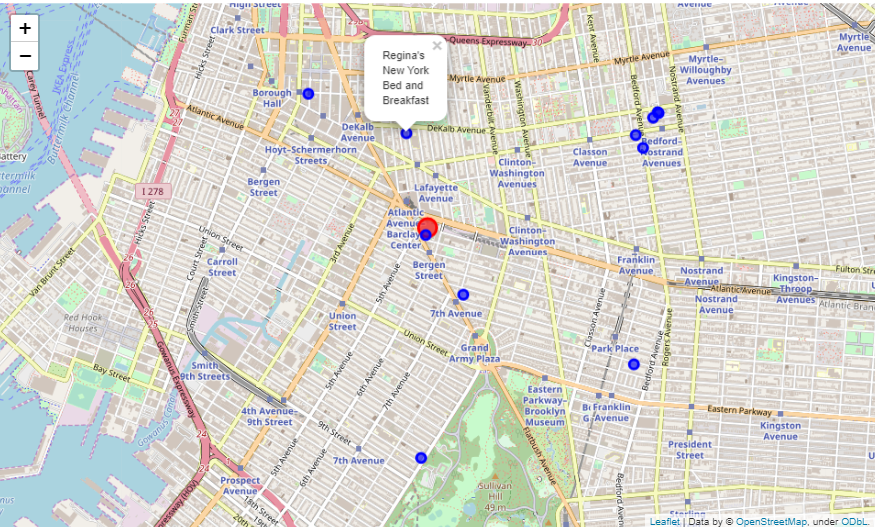

#### >> Start of Neighbourhood analysis

In [419]:
## get the list of neighbourhoods of interest which are close to the Barclays center
## already did a preprocessing and loading the data from a csv

brook_neigh = pd.read_csv(r'C:\Users\rcuberob\Downloads\neighborhoods_brooklyn_2.csv')
brook_neigh.tail(5)

House_number_name                  road neighbourhood     suburb  \
21               333   Schermerhorn Street   Boerum Hill   Brooklyn   
22                 1     Willoughby Street   Fort Greene   Brooklyn   
23               585          Union Street       Gowanus   Brooklyn   
24               186         Nevins Street   Boerum Hill   Brooklyn   
25               211           Dean Street   Boerum Hill   Brooklyn   

           county       city      state  postcode                    country  
21   Kings County   New York   New York     11217   United States of America  
22   Kings County   New York   New York     11201   United States of America  
23   Kings County   New York   New York     11215   United States of America  
24   Kings County   New York   New York     11217   United States of America  
25   Kings County   New York   New York     11217   United States of America

In [420]:
##filter unique neighbourhoods
#keep first duplicate value
brook_neigh = brook_neigh.drop_duplicates(subset=['neighbourhood']).reset_index(drop=True)
brook_neigh.head()

House_number_name                road      neighbourhood     suburb  \
0                32    Underhill Avenue   Prospect Heights   Brooklyn   
1               177       Greene Avenue        Fort Greene   Brooklyn   
2               303   Vanderbilt Avenue       Clinton Hill   Brooklyn   
3               148      Sterling Place         Park Slope   Brooklyn   
4               126          4th Avenue            Gowanus   Brooklyn   

          county       city      state  postcode                    country  
0   Kings County   New York   New York     11238   United States of America  
1   Kings County   New York   New York     11238   United States of America  
2   Kings County   New York   New York     11205   United States of America  
3   Kings County   New York   New York     11217   United States of America  
4   Kings County   New York   New York     11217   United States of America

In [421]:
## adding Latitude and Longitude columns to the neighbourhood dataframe
brook_neigh["Lat"] = ""
brook_neigh["Long"] = ""
brook_neigh

House_number_name                road      neighbourhood     suburb  \
0                32    Underhill Avenue   Prospect Heights   Brooklyn   
1               177       Greene Avenue        Fort Greene   Brooklyn   
2               303   Vanderbilt Avenue       Clinton Hill   Brooklyn   
3               148      Sterling Place         Park Slope   Brooklyn   
4               126          4th Avenue            Gowanus   Brooklyn   
5               345         Dean Street        Boerum Hill   Brooklyn   

          county       city      state  postcode                    country  \
0   Kings County   New York   New York     11238   United States of America   
1   Kings County   New York   New York     11238   United States of America   
2   Kings County   New York   New York     11205   United States of America   
3   Kings County   New York   New York     11217   United States of America   
4   Kings County   New York   New York     11217   United States of America   
5   Kings County   New York   New York     11217   United States of America   

  Lat Long  
0           
1           
2           
3           
4           
5

In [422]:
## function get latitude & longitude, based on a conventional address

def getlatlong(address_to_find):
    geolocator = Nominatim(user_agent="foursquare_agent")
    geo_address_str = str(address_to_find)
    #print (address_to_find)
    location2 = geolocator.geocode(address_to_find)
    #print (location2)
    latitude2 = location2.latitude
    longitude2 = location2.longitude
    #print('\033[94m'+ address_to_find + ' latitude=',latitude2, 'longitude =', longitude2 )
    return (latitude2, longitude2)


In [423]:
## get the latitude and longitude of the addresses above
for index, frame in brook_neigh['House_number_name'].iteritems():
    house = brook_neigh.House_number_name[index]
    road  = brook_neigh.road[index]
    neigh = brook_neigh.neighbourhood[index]
    sub   = brook_neigh.suburb[index]
    city  = brook_neigh.city[index]
    add   = house+road+neigh+sub+city
    get   = getlatlong(add)
    lat2  = get[0]
    long2 = get[1]
    print (add, get)
    brook_neigh.Lat[index]=lat2
    brook_neigh.Long[index]=long2

32 Underhill Avenue Prospect Heights Brooklyn New York (40.68003815, -73.96512605000001)


<ipython-input-423-b750b49dde5b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brook_neigh.Lat[index]=lat2
<ipython-input-423-b750b49dde5b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brook_neigh.Long[index]=long2


177 Greene Avenue Fort Greene Brooklyn New York (40.686989600000004, -73.964884209068)
303 Vanderbilt Avenue Clinton Hill Brooklyn New York (40.68896655, -73.9687716)
148 Sterling Place Park Slope Brooklyn New York (40.6767635, -73.97332640687857)
126 4th Avenue Gowanus Brooklyn New York (40.680511749999994, -73.9813325245131)
345 Dean Street Boerum Hill Brooklyn New York (40.6837209, -73.9802603)


In [424]:
#Brooklyn neighbourhoods of interes with geo-coord.
brook_neigh

House_number_name                road      neighbourhood     suburb  \
0                32    Underhill Avenue   Prospect Heights   Brooklyn   
1               177       Greene Avenue        Fort Greene   Brooklyn   
2               303   Vanderbilt Avenue       Clinton Hill   Brooklyn   
3               148      Sterling Place         Park Slope   Brooklyn   
4               126          4th Avenue            Gowanus   Brooklyn   
5               345         Dean Street        Boerum Hill   Brooklyn   

          county       city      state  postcode                    country  \
0   Kings County   New York   New York     11238   United States of America   
1   Kings County   New York   New York     11238   United States of America   
2   Kings County   New York   New York     11205   United States of America   
3   Kings County   New York   New York     11217   United States of America   
4   Kings County   New York   New York     11217   United States of America   
5   Kings County   New York   New York     11217   United States of America   

       Lat     Long  
0    40.68 -73.9651  
1   40.687 -73.9649  
2   40.689 -73.9688  
3  40.6768 -73.9733  
4  40.6805 -73.9813  
5  40.6837 -73.9803

#### >> Now lets get the venues in these 6 neighbourhoods and check what is the most common

In [426]:
## Function that get the nearby venues of the neighbourhoods of interest.
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['neighbourhood', 
                  'neighbourhood Latitude', 
                  'neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [427]:
## Neighbourhoods of interest
brook_venues = getNearbyVenues(names=brook_neigh['neighbourhood'],
                                   latitudes=brook_neigh['Lat'],
                                   longitudes=brook_neigh['Long']
                                  )

 Prospect Heights
 Fort Greene
 Clinton Hill
 Park Slope
 Gowanus
 Boerum Hill


In [429]:
# Debug print to check if everything worked as expected
print(brook_venues.shape)
brook_venues.head()

(486, 7)


neighbourhood  neighbourhood Latitude  neighbourhood Longitude  \
0   Prospect Heights               40.680038               -73.965126   
1   Prospect Heights               40.680038               -73.965126   
2   Prospect Heights               40.680038               -73.965126   
3   Prospect Heights               40.680038               -73.965126   
4   Prospect Heights               40.680038               -73.965126   

                      Venue  Venue Latitude  Venue Longitude    Venue Category  
0              Ode to Babel       40.679466       -73.964561      Cocktail Bar  
1  LOOK by Plant Love House       40.679941       -73.964325   Thai Restaurant  
2                     Chuko       40.680732       -73.967616  Ramen Restaurant  
3                     LaLou       40.680278       -73.967607          Wine Bar  
4                Weather Up       40.679974       -73.968014      Cocktail Bar

In [430]:
brook_venues.groupby('neighbourhood').count()

neighbourhood Latitude  neighbourhood Longitude  Venue  \
neighbourhood                                                               
 Boerum Hill                           93                       93     93   
 Clinton Hill                          56                       56     56   
 Fort Greene                           57                       57     57   
 Gowanus                               98                       98     98   
 Park Slope                           100                      100    100   
 Prospect Heights                      82                       82     82   

                   Venue Latitude  Venue Longitude  Venue Category  
neighbourhood                                                       
 Boerum Hill                   93               93              93  
 Clinton Hill                  56               56              56  
 Fort Greene                   57               57              57  
 Gowanus                       98               98              98  
 Park Slope                   100              100             100  
 Prospect Heights              82               82              82

In [431]:
print('There are {} uniques categories.'.format(len(brook_venues['Venue Category'].unique())))

There are 134 uniques categories.


In [432]:
#One Hot Encoding
brook_onehot = pd.get_dummies(brook_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brook_onehot['neighbourhood'] = brook_venues['neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [brook_onehot.columns[-1]] + list(brook_onehot.columns[:-1])
brook_onehot = brook_onehot[fixed_columns]

brook_onehot.head()

neighbourhood  American Restaurant  Arts & Crafts Store  \
0   Prospect Heights                    0                    0   
1   Prospect Heights                    0                    0   
2   Prospect Heights                    0                    0   
3   Prospect Heights                    0                    0   
4   Prospect Heights                    0                    0   

   Asian Restaurant  Athletics & Sports  BBQ Joint  Bagel Shop  Bakery  Bank  \
0                 0                   0          0           0       0     0   
1                 0                   0          0           0       0     0   
2                 0                   0          0           0       0     0   
3                 0                   0          0           0       0     0   
4                 0                   0          0           0       0     0   

   Bar  Basketball Stadium  Beer Bar  Board Shop  Bookstore  Boutique  \
0    0                   0         0           0          0         0   
1    0                   0         0           0          0         0   
2    0                   0         0           0          0         0   
3    0                   0         0           0          0         0   
4    0                   0         0           0          0         0   

   Breakfast Spot  Brewery  Burger Joint  Burrito Place  Butcher  Café  \
0               0        0             0              0        0     0   
1               0        0             0              0        0     0   
2               0        0             0              0        0     0   
3               0        0             0              0        0     0   
4               0        0             0              0        0     0   

   Caribbean Restaurant  Chinese Restaurant  Climbing Gym  Cocktail Bar  \
0                     0                   0             0             1   
1                     0                   0             0             0   
2                     0                   0             0             0   
3                     0                   0             0             0   
4                     0                   0             0             1   

   Coffee Shop  Colombian Restaurant  Concert Hall  Convenience Store  \
0            0                     0             0                  0   
1            0                     0             0                  0   
2            0                     0             0                  0   
3            0                     0             0                  0   
4            0                     0             0                  0   

   Cosmetics Shop  Cycle Studio  Dance Studio  Deli / Bodega  \
0               0             0             0              0   
1               0             0             0              0   
2               0             0             0              0   
3               0             0             0              0   
4               0             0             0              0   

   Department Store  Dessert Shop  Diner  Dive Bar  Dog Run  Donut Shop  \
0                 0             0      0         0        0           0   
1                 0             0      0         0        0           0   
2                 0             0      0         0        0           0   
3                 0             0      0         0        0           0   
4                 0             0      0         0        0           0   

   Electronics Store  Ethiopian Restaurant  Event Space  Falafel Restaurant  \
0                  0                     0            0                   0   
1                  0                     0            0                   0   
2                  0                     0            0                   0   
3                  0                     0            0                   0   
4                  0                     0            0                   0   

   Farmers Market  Fast Food Restaurant  Fis

In [433]:
brook_onehot.shape

(486, 135)

In [434]:
brook_grouped = brook_onehot.groupby('neighbourhood').mean().reset_index()
brook_grouped

neighbourhood  American Restaurant  Arts & Crafts Store  \
0        Boerum Hill             0.010753             0.010753   
1       Clinton Hill             0.000000             0.000000   
2        Fort Greene             0.000000             0.000000   
3            Gowanus             0.010204             0.000000   
4         Park Slope             0.040000             0.000000   
5   Prospect Heights             0.012195             0.000000   

   Asian Restaurant  Athletics & Sports  BBQ Joint  Bagel Shop    Bakery  \
0          0.000000            0.000000   0.000000    0.000000  0.053763   
1          0.000000            0.000000   0.000000    0.000000  0.000000   
2          0.017544            0.000000   0.000000    0.017544  0.052632   
3          0.000000            0.010204   0.010204    0.000000  0.020408   
4          0.000000            0.000000   0.010000    0.040000  0.030000   
5          0.000000            0.000000   0.000000    0.012195  0.048780   

   Bank       Bar  Basketball Stadium  Beer Bar  Board Shop  Bookstore  \
0  0.00  0.075269            0.010753  0.000000    0.010753   0.021505   
1  0.00  0.017857            0.000000  0.000000    0.000000   0.000000   
2  0.00  0.035088            0.000000  0.000000    0.000000   0.000000   
3  0.00  0.091837            0.000000  0.000000    0.010204   0.010204   
4  0.01  0.020000            0.000000  0.000000    0.000000   0.000000   
5  0.00  0.109756            0.000000  0.012195    0.000000   0.000000   

   Boutique  Breakfast Spot   Brewery  Burger Joint  Burrito Place   Butcher  \
0  0.000000        0.000000  0.010753      0.021505       0.000000  0.000000   
1  0.000000        0.000000  0.000000      0.000000       0.000000  0.000000   
2  0.017544        0.000000  0.000000      0.000000       0.017544  0.000000   
3  0.000000        0.000000  0.020408      0.020408       0.000000  0.010204   
4  0.010000        0.010000  0.000000      0.010000       0.000000  0.000000   
5  0.000000        0.012195  0.012195      0.012195       0.012195  0.000000   

       Café  Caribbean Restaurant  Chinese Restaurant  Climbing Gym  \
0  0.000000              0.010753            0.000000      0.000000   
1  0.035714              0.017857            0.017857      0.000000   
2  0.070175              0.000000            0.017544      0.000000   
3  0.010204              0.010204            0.000000      0.010204   
4  0.000000              0.020000            0.010000      0.000000   
5  0.048780              0.012195            0.000000      0.000000   

   Cocktail Bar  Coffee Shop  Colombian Restaurant  Concert Hall  \
0      0.010753     0.053763              0.000000      0.010753   
1      0.053571     0.017857              0.000000      0.000000   
2      0.052632     0.017544              0.000000      0.000000   
3      0.020408     0.061224              0.010204      0.000000   
4      0.010000     0.060000              0.000000      0.000000   
5      0.048780     0.036585              0.000000      0.000000   

   Convenience Store  Cosmetics Shop  Cycle Studio  Dance Studio  \
0           0.000000        0.032258          0.00      0.032258   
1           0.017857        0.000000          0.00      0.000000   
2           0.017544        0.000000          0.00      0.000000   
3           0.000000        0.000000          0.00      0.010204   
4           0.000000        0.000000          0.02      0.000000   
5           0.012195        0.000000          0.00      0.000000   

   Deli / Bodega  Department Store  Dessert Shop     Diner  Dive Bar  \
0       0.010753          0.000000      0.043011  0.000000  0.000000   
1       0.000000          0.000000      0.000000  0.017857  0.000000   
2       0.035088          0.017544      0.000000  0.017544  0.000000   
3       0.030612          0.000000      0.040816  0.000000  0.010204   
4       0.000000          0.000000      0.000000  0.000000  0.000000   
5       0.000000          0.000000      0.00000

In [435]:
brook_grouped.shape

(6, 135)

In [437]:
#top 5 venues per neighbourhood

num_top_venues = 5

for hood in brook_grouped['neighbourhood']:
    print("----"+hood+"----")
    temp = brook_grouped[brook_grouped['neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Boerum Hill----
          venue  freq
0           Bar  0.08
1   Coffee Shop  0.05
2        Bakery  0.05
3   Pizza Place  0.04
4  Dessert Shop  0.04


---- Clinton Hill----
                venue  freq
0  Italian Restaurant  0.11
1          Playground  0.07
2        Cocktail Bar  0.05
3                Café  0.04
4     Thai Restaurant  0.04


---- Fort Greene----
                venue  freq
0         Pizza Place  0.09
1  Italian Restaurant  0.07
2                Café  0.07
3              Bakery  0.05
4        Cocktail Bar  0.05


---- Gowanus----
          venue  freq
0           Bar  0.09
1   Coffee Shop  0.06
2   Pizza Place  0.05
3  Dessert Shop  0.04
4   Yoga Studio  0.03


---- Park Slope----
                  venue  freq
0           Coffee Shop  0.06
1  Gym / Fitness Center  0.06
2            Bagel Shop  0.04
3   American Restaurant  0.04
4      Sushi Restaurant  0.03


---- Prospect Heights----
                venue  freq
0                 Bar  0.11
1           Wine Shop  0.06

In [77]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [438]:
## top 10 venues per neighbourhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhood_venues_sorted = pd.DataFrame(columns=columns)
neighbourhood_venues_sorted['neighbourhood'] = brook_grouped['neighbourhood']

for ind in np.arange(brook_grouped.shape[0]):
    neighbourhood_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brook_grouped.iloc[ind, :], num_top_venues)

neighbourhood_venues_sorted

neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
0        Boerum Hill                   Bar                Bakery   
1       Clinton Hill    Italian Restaurant            Playground   
2        Fort Greene           Pizza Place                  Café   
3            Gowanus                   Bar           Coffee Shop   
4         Park Slope  Gym / Fitness Center           Coffee Shop   
5   Prospect Heights                   Bar             Wine Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Coffee Shop          Dessert Shop           Pizza Place   
1          Cocktail Bar           Yoga Studio       Thai Restaurant   
2    Italian Restaurant             Wine Shop                Bakery   
3           Pizza Place          Dessert Shop           Yoga Studio   
4   American Restaurant            Bagel Shop           Pizza Place   
5    Mexican Restaurant                Bakery                  Café   

     6th Most Common Venue    7th Most Common Venue    8th Most Common Venue  \
0             Dance Studio           Cosmetics Shop                   Lounge   
1  New American Restaurant      Japanese Restaurant              Pizza Place   
2             Cocktail Bar                      Bar  New American Restaurant   
3            Deli / Bodega                      Gym       Mexican Restaurant   
4         Sushi Restaurant  New American Restaurant            Grocery Store   
5             Cocktail Bar  New American Restaurant          Thai Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0           Yoga Studio    Japanese Restaurant  
1                  Café                  Diner  
2         Deli / Bodega      Indian Restaurant  
3            Taco Place                 Bakery  
4          Gourmet Shop                 Bakery  
5           Coffee Shop            Yoga Studio

In [439]:
## Recap on BnB on those neighbourhoods
#unique neighbourhoods and count of BnB on each.
dataframe_filtered_bnb['neighbourhood'].value_counts()

Clinton Hill          3
Bedford-Stuyvesant    2
Fort Greene           2
Prospect Heights      1
Windsor Terrace       1
Downtown Brooklyn     1
Crown Heights         1
Name: neighbourhood, dtype: int64

In [440]:
brook_neigh

House_number_name                road      neighbourhood     suburb  \
0                32    Underhill Avenue   Prospect Heights   Brooklyn   
1               177       Greene Avenue        Fort Greene   Brooklyn   
2               303   Vanderbilt Avenue       Clinton Hill   Brooklyn   
3               148      Sterling Place         Park Slope   Brooklyn   
4               126          4th Avenue            Gowanus   Brooklyn   
5               345         Dean Street        Boerum Hill   Brooklyn   

          county       city      state  postcode                    country  \
0   Kings County   New York   New York     11238   United States of America   
1   Kings County   New York   New York     11238   United States of America   
2   Kings County   New York   New York     11205   United States of America   
3   Kings County   New York   New York     11217   United States of America   
4   Kings County   New York   New York     11217   United States of America   
5   Kings County   New York   New York     11217   United States of America   

       Lat     Long  
0    40.68 -73.9651  
1   40.687 -73.9649  
2   40.689 -73.9688  
3  40.6768 -73.9733  
4  40.6805 -73.9813  
5  40.6837 -73.9803

In [441]:
#K-Clusters grouping the neighbourhoods in 3 clusters

kclusters = 3

brook_grouped_clustering = brook_grouped.drop('neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brook_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5] 


array([0, 1, 1, 0, 2])

In [442]:
# add clustering labels
neighbourhood_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brook_merged = brook_neigh

# merge brook_grouped with brook_neigh to add latitude/longitude for each neighbourhood
brook_merged = brook_merged.join(neighbourhood_venues_sorted.set_index('neighbourhood'), on='neighbourhood')

In [443]:
brook_merged

House_number_name                road      neighbourhood     suburb  \
0                32    Underhill Avenue   Prospect Heights   Brooklyn   
1               177       Greene Avenue        Fort Greene   Brooklyn   
2               303   Vanderbilt Avenue       Clinton Hill   Brooklyn   
3               148      Sterling Place         Park Slope   Brooklyn   
4               126          4th Avenue            Gowanus   Brooklyn   
5               345         Dean Street        Boerum Hill   Brooklyn   

          county       city      state  postcode                    country  \
0   Kings County   New York   New York     11238   United States of America   
1   Kings County   New York   New York     11238   United States of America   
2   Kings County   New York   New York     11205   United States of America   
3   Kings County   New York   New York     11217   United States of America   
4   Kings County   New York   New York     11217   United States of America   
5   Kings County   New York   New York     11217   United States of America   

       Lat     Long  Cluster Labels 1st Most Common Venue  \
0    40.68 -73.9651               0                   Bar   
1   40.687 -73.9649               1           Pizza Place   
2   40.689 -73.9688               1    Italian Restaurant   
3  40.6768 -73.9733               2  Gym / Fitness Center   
4  40.6805 -73.9813               0                   Bar   
5  40.6837 -73.9803               0                   Bar   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0             Wine Shop    Mexican Restaurant                Bakery   
1                  Café    Italian Restaurant             Wine Shop   
2            Playground          Cocktail Bar           Yoga Studio   
3           Coffee Shop   American Restaurant            Bagel Shop   
4           Coffee Shop           Pizza Place          Dessert Shop   
5                Bakery           Coffee Shop          Dessert Shop   

  5th Most Common Venue    6th Most Common Venue    7th Most Common Venue  \
0                  Café             Cocktail Bar  New American Restaurant   
1                Bakery             Cocktail Bar                      Bar   
2       Thai Restaurant  New American Restaurant      Japanese Restaurant   
3           Pizza Place         Sushi Restaurant  New American Restaurant   
4           Yoga Studio            Deli / Bodega                      Gym   
5           Pizza Place             Dance Studio           Cosmetics Shop   

     8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0          Thai Restaurant           Coffee Shop            Yoga Studio  
1  New American Restaurant         Deli / Bodega      Indian Restaurant  
2              Pizza Place                  Café                  Diner  
3            Grocery Store          Gourmet Shop                 Bakery  
4       Mexican Restaurant            Taco Place                 Bakery  
5                   Lounge           Yoga Studio    Japanese Restaurant

In [444]:
## dropping some columns we do not need for now
col_2_drop= 'House_number_name', 'road', 'county', 'city', 'state', 'country'
brook_merged_short = brook_merged.drop(['House_number_name','road', 'county', 'city', 'state', 'country'],1)
brook_merged_short

neighbourhood     suburb  postcode      Lat     Long  Cluster Labels  \
0   Prospect Heights   Brooklyn     11238    40.68 -73.9651               0   
1        Fort Greene   Brooklyn     11238   40.687 -73.9649               1   
2       Clinton Hill   Brooklyn     11205   40.689 -73.9688               1   
3         Park Slope   Brooklyn     11217  40.6768 -73.9733               2   
4            Gowanus   Brooklyn     11217  40.6805 -73.9813               0   
5        Boerum Hill   Brooklyn     11217  40.6837 -73.9803               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                   Bar             Wine Shop    Mexican Restaurant   
1           Pizza Place                  Café    Italian Restaurant   
2    Italian Restaurant            Playground          Cocktail Bar   
3  Gym / Fitness Center           Coffee Shop   American Restaurant   
4                   Bar           Coffee Shop           Pizza Place   
5                   Bar                Bakery           Coffee Shop   

  4th Most Common Venue 5th Most Common Venue    6th Most Common Venue  \
0                Bakery                  Café             Cocktail Bar   
1             Wine Shop                Bakery             Cocktail Bar   
2           Yoga Studio       Thai Restaurant  New American Restaurant   
3            Bagel Shop           Pizza Place         Sushi Restaurant   
4          Dessert Shop           Yoga Studio            Deli / Bodega   
5          Dessert Shop           Pizza Place             Dance Studio   

     7th Most Common Venue    8th Most Common Venue 9th Most Common Venue  \
0  New American Restaurant          Thai Restaurant           Coffee Shop   
1                      Bar  New American Restaurant         Deli / Bodega   
2      Japanese Restaurant              Pizza Place                  Café   
3  New American Restaurant            Grocery Store          Gourmet Shop   
4                      Gym       Mexican Restaurant            Taco Place   
5           Cosmetics Shop                   Lounge           Yoga Studio   

  10th Most Common Venue  
0            Yoga Studio  
1      Indian Restaurant  
2                  Diner  
3                 Bakery  
4                 Bakery  
5    Japanese Restaurant

In [446]:
##create map with clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brook_merged_short['Lat'], brook_merged_short['Long'], brook_merged_short['neighbourhood'], brook_merged_short['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


- Cluster Map for the Brooklyn neighbourhoods of interest.

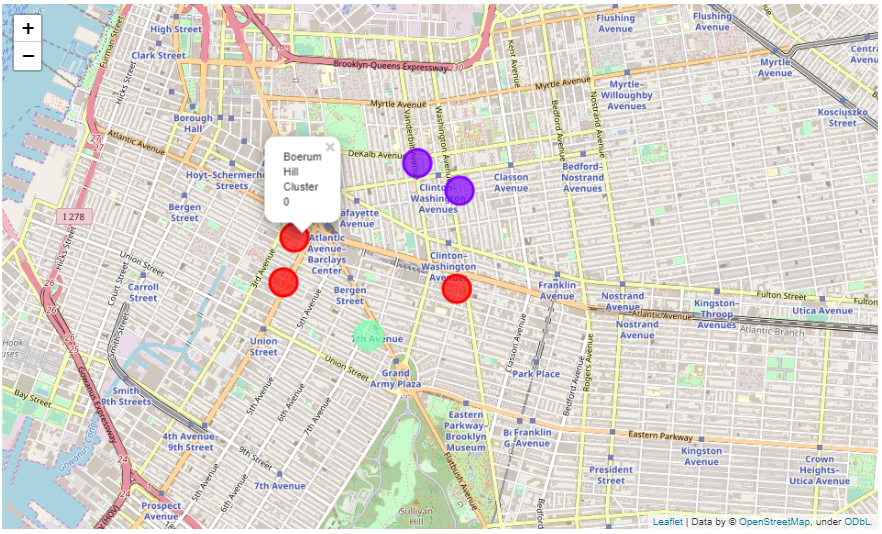

In [447]:
brook_merged_short.loc[brook_merged_short['Cluster Labels'] == 0, brook_merged_short.columns[[0] + list(range(5, brook_merged_short.shape[1]))]]

neighbourhood  Cluster Labels 1st Most Common Venue  \
0   Prospect Heights               0                   Bar   
4            Gowanus               0                   Bar   
5        Boerum Hill               0                   Bar   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0             Wine Shop    Mexican Restaurant                Bakery   
4           Coffee Shop           Pizza Place          Dessert Shop   
5                Bakery           Coffee Shop          Dessert Shop   

  5th Most Common Venue 6th Most Common Venue    7th Most Common Venue  \
0                  Café          Cocktail Bar  New American Restaurant   
4           Yoga Studio         Deli / Bodega                      Gym   
5           Pizza Place          Dance Studio           Cosmetics Shop   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0       Thai Restaurant           Coffee Shop            Yoga Studio  
4    Mexican Restaurant            Taco Place                 Bakery  
5                Lounge           Yoga Studio    Japanese Restaurant

In [448]:
brook_merged_short.loc[brook_merged_short['Cluster Labels'] == 1, brook_merged_short.columns[[0] + list(range(5, brook_merged_short.shape[1]))]]

neighbourhood  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
1    Fort Greene               1           Pizza Place                  Café   
2   Clinton Hill               1    Italian Restaurant            Playground   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1    Italian Restaurant             Wine Shop                Bakery   
2          Cocktail Bar           Yoga Studio       Thai Restaurant   

     6th Most Common Venue 7th Most Common Venue    8th Most Common Venue  \
1             Cocktail Bar                   Bar  New American Restaurant   
2  New American Restaurant   Japanese Restaurant              Pizza Place   

  9th Most Common Venue 10th Most Common Venue  
1         Deli / Bodega      Indian Restaurant  
2                  Café                  Diner

In [449]:
brook_merged_short.loc[brook_merged_short['Cluster Labels'] == 2, brook_merged_short.columns[[0] + list(range(5, brook_merged_short.shape[1]))]]

neighbourhood  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3    Park Slope               2  Gym / Fitness Center           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
3   American Restaurant            Bagel Shop           Pizza Place   

  6th Most Common Venue    7th Most Common Venue 8th Most Common Venue  \
3      Sushi Restaurant  New American Restaurant         Grocery Store   

  9th Most Common Venue 10th Most Common Venue  
3          Gourmet Shop                 Bakery

- 3 groups of clusters help identify similarities between neighbourhoods as diferences.
- Cluster 0 is where we will focus on identifying possible properties for the B&B

In [452]:
##create map with clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brook_merged_short['Lat'], brook_merged_short['Long'], brook_merged_short['neighbourhood'], brook_merged_short['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

 
 #####Adding the BnB locations

    
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='Black',
    popup='Barclays Center',
    fill = True,
    fill_color = 'Black',
    fill_opacity = 0.6
).add_to(map_clusters)

# add the Bed & Breakfast as blue circle markers
for lat, lng, label in zip(dataframe_filtered_bnb.lat, dataframe_filtered_bnb.lng, dataframe_filtered_bnb.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_clusters)

    
map_clusters

- Barclay Center + Neighbourhood Clusters + BnB in the area.
- Barclay Center:Black
- Clusters: 0-Red, 1-Purple, 2-Cyan
- Bnb: Blue dots

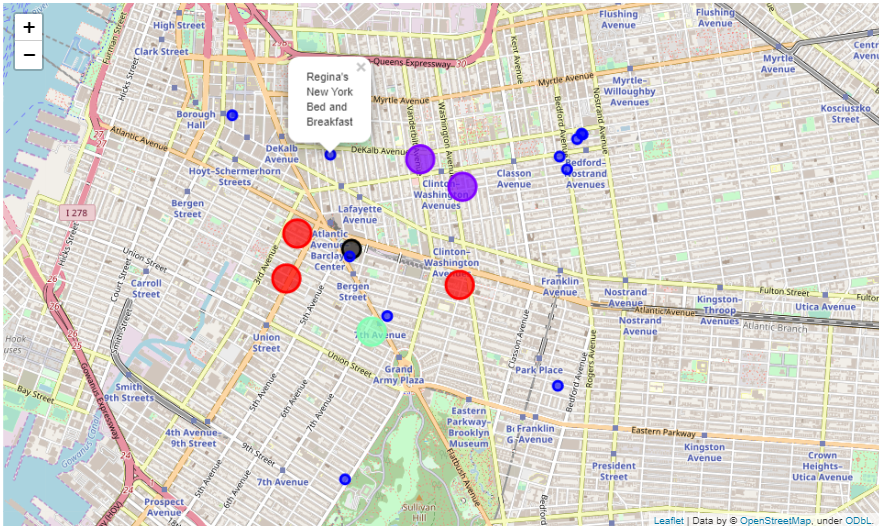

* Here it we can see that the BnB are pretty much spaced out or not too close to the Barclay Center, which can be also due to cheaper cost on the real estate.
* In addition you can see that 2 neighbourhoods does not have a BnB that is Boerum Hill & Gowanus
* We can use those locations to find properties and compare them against Clinton Hill and Bed-Stuy
* As we can see there are 3 zip codes we can use for Zillow information gathering, we will focus on 2

In [129]:
brook_merged_short[['neighbourhood', 'postcode', 'Cluster Labels']]

neighbourhood  postcode  Cluster Labels
0   Prospect Heights     11238               0
1        Fort Greene     11238               1
2       Clinton Hill     11205               1
3         Park Slope     11217               2
4            Gowanus     11217               0
5        Boerum Hill     11217               0

In [453]:
dataframe_filtered_bnb[['name','categories','neighbourhood','postalCode']]

name       categories       neighbourhood  \
0   Regina's New York Bed and Breakfast  Bed & Breakfast         Fort Greene   
1          Garden Green Bed & Breakfast  Bed & Breakfast    Prospect Heights   
2                  3B Bed And Breakfast  Bed & Breakfast   Downtown Brooklyn   
3         Bed And Breakfast On The Park  Bed & Breakfast     Windsor Terrace   
4               Imhotep Bed & Breakfast  Bed & Breakfast        Clinton Hill   
5              Sterling Bed & Breakfast  Bed & Breakfast       Crown Heights   
6                                Hostel           Hostel  Bedford-Stuyvesant   
7        Lafayette International Hostel           Hostel        Clinton Hill   
8                         Dekalb Hostel           Hostel  Bedford-Stuyvesant   
9                      Esperanto Hostel           Hostel        Clinton Hill   
10                      Baba Yaga's Hut  Bed & Breakfast         Fort Greene   

   postalCode  
0       11217  
1       11238  
2       11201  
3       11215  
4       11216  
5       11216  
6       11205  
7       11205  
8       11205  
9       11205  
10      11217

In [454]:
dataframe_filtered_bnb['postalCode'].value_counts()

11205    4
11217    2
11216    2
11201    1
11238    1
11215    1
Name: postalCode, dtype: int64

####  Real Estate Data comparing 2 zip codes 11205 11217
- The zillow was webscrapped and organized into csv files
- There was incomplete data and foreclousure properties that are not taken for this analysis

In [455]:
#reading Zillow information on zip code 11205 vs 11217

brook_11205_zillow = pd.read_csv(r'C:\Users\rcuberob\Downloads\properties_11205_zillow.csv')
brook_11217_zillow = pd.read_csv(r'C:\Users\rcuberob\Downloads\properties_11217_zillow.csv')


In [456]:
brook_11205_zillow.head()

type_of_property                                   address      city  \
0  Apartment for sale        35 Cumberland St Brooklyn NY 11205  Brooklyn   
1  Apartment for sale         197 Waverly Ave Brooklyn NY 11205  Brooklyn   
2      Co-op for sale  185 Clinton Ave APT 1A Brooklyn NY 11205  Brooklyn   
3      Co-op for sale     205 Clinton Ave 12A Brooklyn NY 11205  Brooklyn   
4  Townhouse for sale      280 Washington Ave Brooklyn NY 11205  Brooklyn   

  state  postal_code    price  beds  bath  area_sqft  \
0    NY        11205  1075000     4     4       2520   
1    NY        11205  4500000     3     3       4500   
2    NY        11205   449000     1     1        651   
3    NY        11205   730000     2     1        750   
4    NY        11205  9200000     7     8      10000   

            real_estate_provider  \
0  Keller Williams Realty Empire   
1                       Corcoran   
2           Brown Harris Stevens   
3             AP Realty Group NY   
4                       Corcoran   

                                             webpage  
0  https://www.zillow.com/homedetails/35-Cumberla...  
1  https://www.zillow.com/homedetails/197-Waverly...  
2  https://www.zillow.com/homedetails/185-Clinton...  
3  https://www.zillow.com/homedetails/205-Clinton...  
4  https://www.zillow.com/homedetails/280-Washing...

In [457]:
brook_11217_zillow.head()

type_of_property                            address      city state  \
0  Townhouse for sale  134 Douglass St Brooklyn NY 11217  Brooklyn    NY   
1  Townhouse for sale     471 State St Brooklyn NY 11217  Brooklyn    NY   
2      House for sale     347 State St Brooklyn NY 11217  Brooklyn    NY   
3  Apartment for sale  205 Berkeley Pl Brooklyn NY 11217  Brooklyn    NY   
4      House for sale  217 Berkeley Pl Brooklyn NY 11217  Brooklyn    NY   

   postal_code    price  beds  bath  area_sqft    real estate provider  \
0        11217  1688000     3     3       1800  Brownstone Real Estate   
1        11217  5880000     4     3       4800                Corcoran   
2        11217  3795000     3     3       3757      Corcoran - MH Soho   
3        11217  3850000     5     4       4500                     NaN   
4        11217  5250000     6     5       5415                 Compass   

                                             webpage  
0  https://www.zillow.com/homedetails/134-Douglas...  
1  https://www.zillow.com/homedetails/471-State-S...  
2  https://www.zillow.com/homedetails/347-State-S...  
3  https://www.zillow.com/homedetails/205-Berkele...  
4  https://www.zillow.com/homedetails/217-Berkele...

* For the purpose of a BnB we are looking for large properties and also with good amount of bedrooms.
* Let's take a look at the distribution of key feautures bed

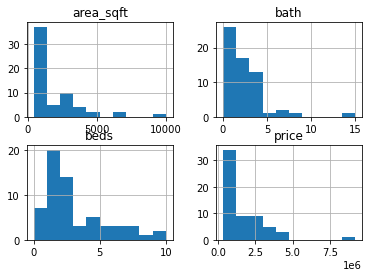

In [233]:
feat_data_11205 = brook_11205_zillow[['type_of_property','price','beds','bath','area_sqft']]
feat_data_11205.hist()
plt.show()

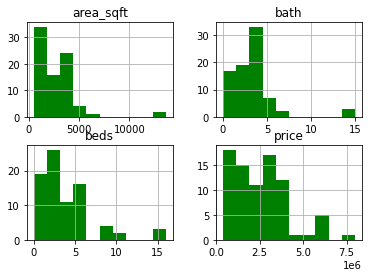

In [459]:
feat_data_11217 = brook_11217_zillow[['price','beds','bath','area_sqft']]
feat_data_11217.hist(color="green")
plt.show()

In [460]:
#this shows a few outliers in property size removing those properties to have a better picture
brook_11205_zillow['area_sqft'].max()

59800

In [461]:
#this shows a few outliers in property size removing those properties to have a better picture
brook_11217_zillow['area_sqft'].max()

13640

In [462]:
brook_11205_zillow.drop(brook_11205_zillow[brook_11205_zillow['area_sqft']== 59800].index, inplace=True)
brook_11205_zillow['area_sqft'].max()

10000

In [463]:
brook_11217_zillow.drop(brook_11217_zillow[brook_11217_zillow['area_sqft']== 13640].index, inplace=True)
brook_11217_zillow['area_sqft'].max()

6940

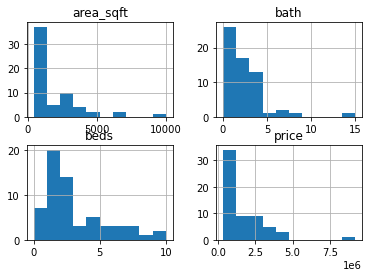

In [465]:
feat_data_11205 = brook_11205_zillow[['type_of_property','price','beds','bath','area_sqft']]
feat_data_11205.hist()
plt.show()

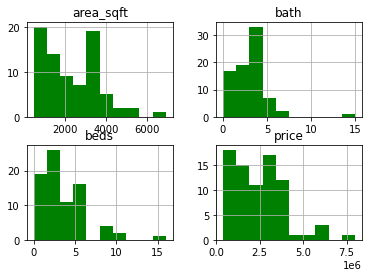

In [466]:
feat_data_11217 = brook_11217_zillow[['type_of_property','price','beds','bath','area_sqft']]
feat_data_11217.hist(color = "green")
plt.show()

##### Will perform analysis on 11205 1st

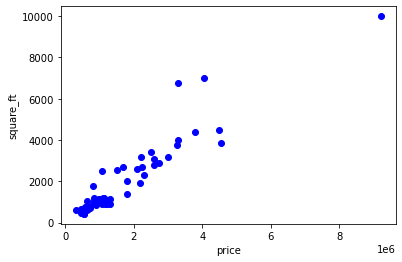

In [481]:
plt.scatter(feat_data_11205.price, feat_data_11205.area_sqft, color='blue')
plt.ylabel('square_ft')
plt.xlabel('price')
plt.show()

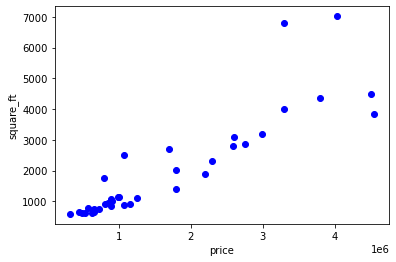

In [482]:
#creating train and test dataset
msk= np.random.rand(len(feat_data_11205)) < 0.7
train = feat_data_11205[msk]
test =  feat_data_11205[~msk]

#Train Data Distribution
plt.scatter(train.price,train.area_sqft, color='blue')
plt.xlabel("price")
plt.ylabel('square_ft')
plt.show()

In [483]:
#Modeling
#using sklearn package to model data

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['price']])
train_y = np.asanyarray(train[['area_sqft']])
regr.fit (train_x, train_y)
#the coeficients
print ('Coefficients: ', regr.coef_)
print ('Intercepts: ', regr.intercept_)

Coefficients:  [[0.00119733]]
Intercepts:  [-0.58359369]


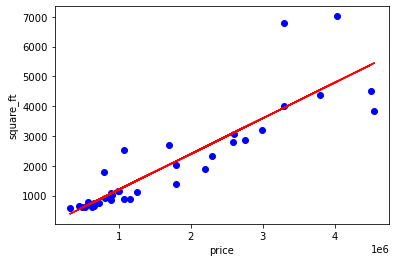

In [484]:
#plotting results

plt.scatter(train.price,train.area_sqft, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("price")
plt.ylabel('square_ft')
plt.show()

In [485]:
#Evaluation and Metrics
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['price']])
test_y = np.asanyarray(test[['area_sqft']])
test_y_hat = regr.predict(test_x)

print("Means Absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_hat, test_y) )

Means Absolute error: 300.83
Residual sum of squares (MSE): 157683.53
R2-score: 0.96


In [486]:
feat_data_11205.corr()['price'].sort_values()

beds         0.599697
bath         0.632013
area_sqft    0.934563
price        1.000000
Name: price, dtype: float64

- The above shows which feature correlates better with the price
- As expected the price increase as the area of the property

##### Will perform analysis on 11217

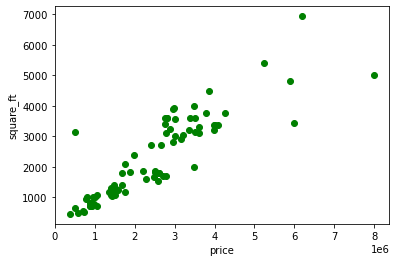

In [493]:
plt.scatter(feat_data_11217.price, feat_data_11217.area_sqft, color='green')
plt.ylabel('square_ft')
plt.xlabel('price')
plt.show()

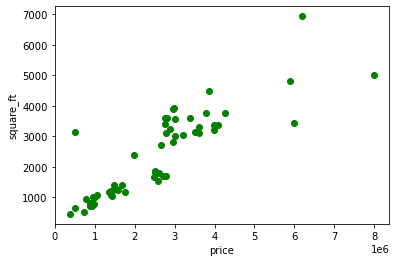

In [494]:
#creating train and test dataset
msk= np.random.rand(len(feat_data_11217)) < 0.7
train = feat_data_11217[msk]
test =  feat_data_11217[~msk]

#Train Data Distribution
plt.scatter(train.price,train.area_sqft, color='green')
plt.xlabel("price")
plt.ylabel('square_ft')
plt.show()

In [495]:
#Modeling
#using sklearn package to model data

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['price']])
train_y = np.asanyarray(train[['area_sqft']])
regr.fit (train_x, train_y)
#the coeficients
print ('Coefficients: ', regr.coef_)
print ('Intercepts: ', regr.intercept_)

Coefficients:  [[0.00077123]]
Intercepts:  [400.95683724]


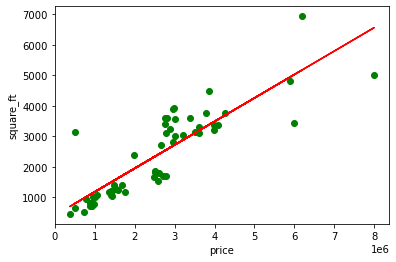

In [496]:
#plotting results

plt.scatter(train.price,train.area_sqft, color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("price")
plt.ylabel('square_ft')
plt.show()

In [497]:
#Evaluation and Metrics
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['price']])
test_y = np.asanyarray(test[['area_sqft']])
test_y_hat = regr.predict(test_x)

print("Means Absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_hat, test_y) )

Means Absolute error: 436.06
Residual sum of squares (MSE): 290925.44
R2-score: 0.66


In [498]:
feat_data_11217.corr()['price'].sort_values()

bath         0.678647
beds         0.684959
area_sqft    0.870823
price        1.000000
Name: price, dtype: float64

- As expected the area has a better correlation with price.
- other factors in this zip code are a bit higher thank in 11205
- Below we get the mean values of key features in the data frame
- This will aid on the recommendation provided

In [499]:
feat_data_11217.groupby(['type_of_property']).mean()

price      beds      bath    area_sqft
type_of_property                                                 
Apartment for sale  3.301000e+06  6.285714  4.333333  3493.952381
Co-op for sale      2.021714e+06  2.142857  2.142857  1968.000000
Condo for sale      1.591626e+06  2.000000  1.971429  1243.714286
For sale by owner   6.000000e+06  9.000000  4.000000  3432.000000
House for sale      3.773167e+06  4.333333  3.833333  3352.333333
New construction    2.599000e+06  4.000000  3.000000  1806.000000
Townhouse for sale  3.126562e+06  3.250000  2.625000  3244.500000

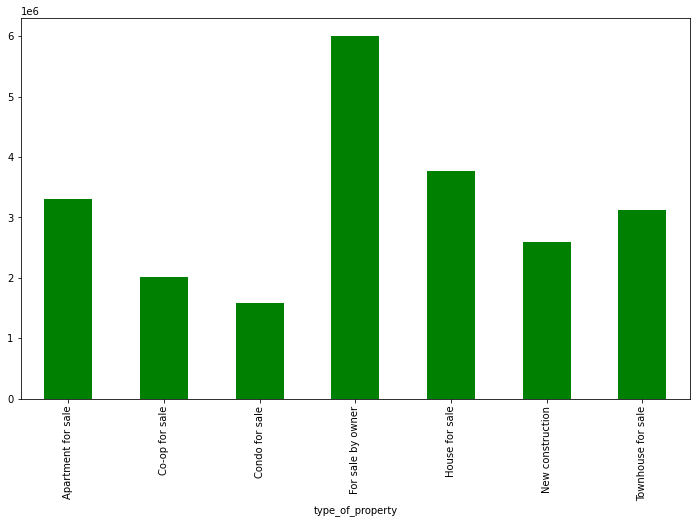

In [500]:
feat_data_11217.groupby(['type_of_property']).mean()['price'].plot.bar(figsize=(12,7), color ='green')

In [501]:
feat_data_11205.groupby(['type_of_property']).mean()

price      beds      bath    area_sqft
type_of_property                                                  
Apartment for sale   2.656929e+06  5.214286  4.285714  3431.071429
Co-op for sale       6.505833e+05  1.166667  1.166667   786.833333
Condo for sale       8.598621e+05  1.275862  1.448276   873.551724
For sale by owner    5.250000e+05  1.000000  1.000000   620.000000
House for sale       2.261998e+06  3.285714  2.571429  2844.571429
Lot / Land for sale  7.990000e+05  0.000000  0.000000  1776.000000
Townhouse for sale   5.500000e+06  6.000000  5.666667  5576.666667

In [502]:
feat_data_11205.describe()

price       beds       bath     area_sqft
count  6.100000e+01  61.000000  61.000000     61.000000
mean   1.634336e+06   2.606557   2.377049   1920.114754
std    1.459103e+06   2.458175   2.281549   1798.628098
min    3.200000e+05   0.000000   0.000000    417.000000
25%    7.250000e+05   1.000000   1.000000    770.000000
50%    1.075000e+06   2.000000   2.000000   1104.000000
75%    2.199990e+06   4.000000   3.000000   2700.000000
max    9.200000e+06  10.000000  15.000000  10000.000000

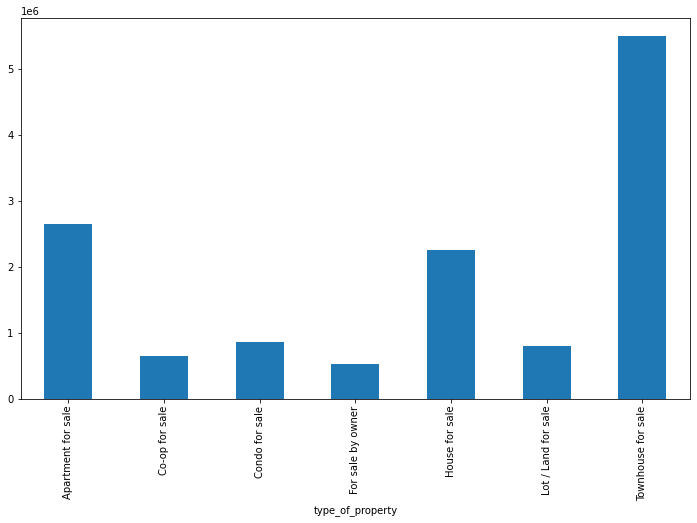

In [503]:
feat_data_11205.groupby(['type_of_property']).mean()['price'].plot.bar(figsize=(12,7))

- Looking at the information of 11217 we can see that "House for Sale" & "Townhouse for sale" are the best option
- with regards of size and price apartments are not suitable for a business
- With that said we are going to filter out the needed information of properties on sale and lcoate them on the map.
- removing properties smaller than 2500sqft and properties beyond 4 million

In [506]:
## Looking at the information of 11217 we can see that "House for Sale" & "Townhouse for sale" are the best option
## with regards of size and price apartments are not suitable for a business
## with that said we are going to filter out the needed information of properties on sale and lcoate them on the map.

brook_11217_zillow_filtered = brook_11217_zillow[(brook_11217_zillow.type_of_property == "Townhouse for sale") | (brook_11217_zillow.type_of_property == "House for sale")].reset_index(drop=True)

##### removing properties smaller than 2500sqft and properties beyond 4 million

brook_11217_zillow_filtered = brook_11217_zillow_filtered[(brook_11217_zillow_filtered.area_sqft >= 2500) & (brook_11217_zillow_filtered.price <= 4000000)].reset_index(drop=True)


In [507]:
brook_11217_zillow_filtered

type_of_property                               address      city state  \
0      House for sale        347 State St Brooklyn NY 11217  Brooklyn    NY   
1      House for sale      279 Wyckoff St Brooklyn NY 11217  Brooklyn    NY   
2      House for sale        446 State St Brooklyn NY 11217  Brooklyn    NY   
3  Townhouse for sale   30 Saint Johns Pl Brooklyn NY 11217  Brooklyn    NY   
4  Townhouse for sale      119 Lincoln Pl Brooklyn NY 11217  Brooklyn    NY   
5  Townhouse for sale         187 6th Ave Brooklyn NY 11217  Brooklyn    NY   
6  Townhouse for sale  160 S Portland Ave Brooklyn NY 11217  Brooklyn    NY   
7      House for sale        76 Nevins St Brooklyn NY 11217  Brooklyn    NY   
8  Townhouse for sale      602 Pacific St Brooklyn NY 11217  Brooklyn    NY   

   postal_code    price  beds  bath  area_sqft  \
0        11217  3795000     3     3       3757   
1        11217  3999000     4     4       3200   
2        11217  2950000     4     4       2816   
3        11217  2999500     6     3       3556   
4        11217  3350000     4     3       3200   
5        11217  3500000     5     4       3600   
6        11217  2950000     4     4       3900   
7        11217  3150000     4     3       2926   
8        11217  2650000     0     1       2700   

                    real estate provider  \
0                     Corcoran - MH Soho   
1                                    NaN   
2                                    NaN   
3   Engel & Völkers New York Real Estate   
4                                Compass   
5         John A Maguire Real Estate LLC   
6                                    NaN   
7                                    NaN   
8  Avenue Sotheby's International Realty   

                                             webpage  
0  https://www.zillow.com/homedetails/347-State-S...  
1  https://www.zillow.com/homedetails/279-Wyckoff...  
2  https://www.zillow.com/homedetails/446-State-S...  
3  https://www.zillow.com/homedetails/30-Saint-Jo...  
4  https://www.zillow.com/homedetails/119-Lincoln...  
5  https://www.zillow.com/homedetails/187-6th-Ave...  
6  https://www.zillow.com/homedetails/160-S-Portl...  
7  https://www.zillow.com/homedetails/76-Nevins-S...  
8  https://www.zillow.com/homedetails/602-Pacific...

In [508]:
## add latitude and longitude columns
brook_11217_zillow_filtered["Lat"] = ""
brook_11217_zillow_filtered["Long"]= ""

In [509]:
## get the latitude and longitude of the addresses above
for index, frame in brook_11217_zillow_filtered['type_of_property'].iteritems():
    address_z = brook_11217_zillow_filtered.address[index]
    get   = getlatlong(address_z)
    latz  = get[0]
    longz = get[1]
    print (address_z, get)
    brook_11217_zillow_filtered.Lat[index]=latz
    brook_11217_zillow_filtered.Long[index]=longz

347 State St Brooklyn NY 11217 (40.6879958, -73.9851659)


<ipython-input-509-b90e39d83b00>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brook_11217_zillow_filtered.Lat[index]=latz
<ipython-input-509-b90e39d83b00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brook_11217_zillow_filtered.Long[index]=longz


279 Wyckoff St Brooklyn NY 11217 (40.683240350000005, -73.98309738746494)
446 State St Brooklyn NY 11217 (40.68670775, -73.98260426614453)
30 Saint Johns Pl Brooklyn NY 11217 (40.67795625, -73.97841281353838)
119 Lincoln Pl Brooklyn NY 11217 (40.6764441, -73.97595785)
187 6th Ave Brooklyn NY 11217 (40.67623075, -73.97714865316291)
160 S Portland Ave Brooklyn NY 11217 (40.68455265, -73.9743115320673)
76 Nevins St Brooklyn NY 11217 (40.6865053, -73.9826228146923)
602 Pacific St Brooklyn NY 11217 (40.6830122, -73.9771504)


In [510]:
brook_11217_zillow_filtered

type_of_property                               address      city state  \
0      House for sale        347 State St Brooklyn NY 11217  Brooklyn    NY   
1      House for sale      279 Wyckoff St Brooklyn NY 11217  Brooklyn    NY   
2      House for sale        446 State St Brooklyn NY 11217  Brooklyn    NY   
3  Townhouse for sale   30 Saint Johns Pl Brooklyn NY 11217  Brooklyn    NY   
4  Townhouse for sale      119 Lincoln Pl Brooklyn NY 11217  Brooklyn    NY   
5  Townhouse for sale         187 6th Ave Brooklyn NY 11217  Brooklyn    NY   
6  Townhouse for sale  160 S Portland Ave Brooklyn NY 11217  Brooklyn    NY   
7      House for sale        76 Nevins St Brooklyn NY 11217  Brooklyn    NY   
8  Townhouse for sale      602 Pacific St Brooklyn NY 11217  Brooklyn    NY   

   postal_code    price  beds  bath  area_sqft  \
0        11217  3795000     3     3       3757   
1        11217  3999000     4     4       3200   
2        11217  2950000     4     4       2816   
3        11217  2999500     6     3       3556   
4        11217  3350000     4     3       3200   
5        11217  3500000     5     4       3600   
6        11217  2950000     4     4       3900   
7        11217  3150000     4     3       2926   
8        11217  2650000     0     1       2700   

                    real estate provider  \
0                     Corcoran - MH Soho   
1                                    NaN   
2                                    NaN   
3   Engel & Völkers New York Real Estate   
4                                Compass   
5         John A Maguire Real Estate LLC   
6                                    NaN   
7                                    NaN   
8  Avenue Sotheby's International Realty   

                                             webpage      Lat     Long  
0  https://www.zillow.com/homedetails/347-State-S...   40.688 -73.9852  
1  https://www.zillow.com/homedetails/279-Wyckoff...  40.6832 -73.9831  
2  https://www.zillow.com/homedetails/446-State-S...  40.6867 -73.9826  
3  https://www.zillow.com/homedetails/30-Saint-Jo...   40.678 -73.9784  
4  https://www.zillow.com/homedetails/119-Lincoln...  40.6764  -73.976  
5  https://www.zillow.com/homedetails/187-6th-Ave...  40.6762 -73.9771  
6  https://www.zillow.com/homedetails/160-S-Portl...  40.6846 -73.9743  
7  https://www.zillow.com/homedetails/76-Nevins-S...  40.6865 -73.9826  
8  https://www.zillow.com/homedetails/602-Pacific...   40.683 -73.9772

#### >> Map that includes the Barclay Center, the BnB sorrounding and the properties we picked to suggest for a possible BnB
- Barclay Center: Black
- BnB : Green
- Properties on Sale: Blue+Cloud, the Pop_Up include the property Link page on Zillow

In [512]:
##create map with clusters
from folium import plugins
# create map
map_ALL = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

instances = plugins.MarkerCluster().add_to(map_ALL)

# add markers to the map
#markers_colors = []
#for lat, lon, poi, cluster in zip(brook_merged_short['Lat'], brook_merged_short['Long'], brook_merged_short['neighbourhood'], brook_merged_short['Cluster Labels']):
#    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
#    folium.CircleMarker(
#        [lat, lon],
#        radius=25,
#        popup=label,
#        color=rainbow[cluster-1],
#        fill=True,
#        fill_color=rainbow[cluster-1],
#        fill_opacity=0.7).add_to(instances)

 
 #####Adding the BnB locations

    
folium.Marker(
    [latitude, longitude],
    popup='Barclays Center',
    icon=folium.Icon(color='black', icon='info-sign')

).add_to(map_ALL)


# add the Bed & Breakfast as blue circle markers
for lat, lng, label in zip(dataframe_filtered_bnb.lat, dataframe_filtered_bnb.lng, dataframe_filtered_bnb.name):
    folium.Marker(
        [lat, lng],
        popup=label,
        icon=folium.Icon(color='green', icon='info-sig')
    ).add_to(instances)


    
###### 

# add the properties suggested 
for lat, lng, label in zip(brook_11217_zillow_filtered.Lat, brook_11217_zillow_filtered.Long, brook_11217_zillow_filtered.webpage):
    folium.Marker(
        [lat, lng],
        popup=label,
        icon=folium.Icon(color='blue', icon='cloud')
    ).add_to(map_ALL)





map_ALL

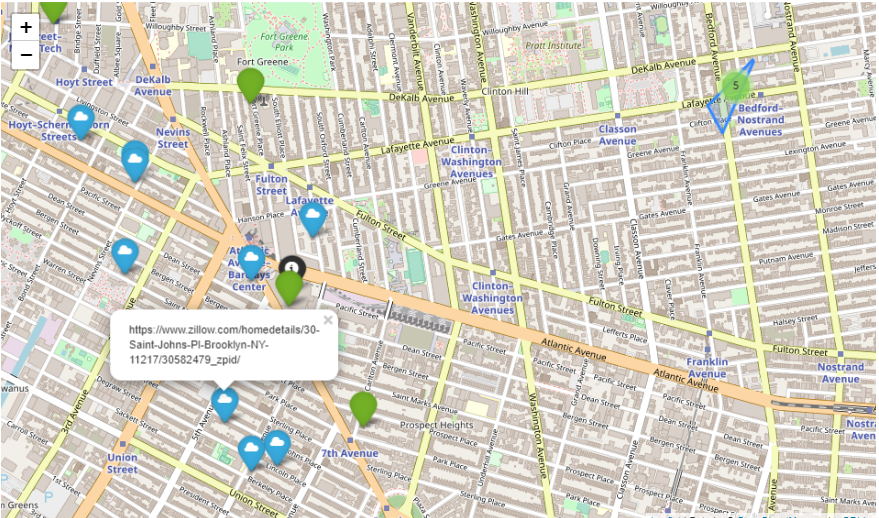

### Results and Discussion

Brooklyn one of the 5 Boroughs of New York City , which has risen to prominence due to investments in the real estate sector and quick transport to Manhattan has become a trendy place for visitors from all over the world, we took the task to find a suitable list of properties that are located close to the Barclay center within 1.6km, with venues of interest and not crowded with BnB/Hostels.

The result of the initial analysis yielded a list of 11 B&B nearby, but mostly concentrated in the Clinton Hill-Bed-Stuy neighborhoods, which gave room to look into adjacent neighborhoods to the Barclay Center in the opposite direction and closer to Manhattan as well close to sites of interest such as museums and parks.

Once identified K-Means technique was performed to find similarities & differences between the neighborhoods, this indeed help solidify the idea of looking for properties in Cluster-0 zip code 11217, their neighborhoods offer similar venues such as Bar's, Cafe's and international restaurants to add into the visitor experience.

The web scrapping on Zillow yielded a list of 100+ for sale properties on each of the 2 Postal Codes under analysis, the 11205 (Clinton hill) and the 11217 (Gowanus, Boerum, Park Slope). Data needed some cleaning and removing outliers with wrong square-foot-area or missing information. The linear regression analysis with remaining data validate the veracity of it, since as square-feet-area increases so the price, once outliers and missing data is cleared out, this gives a good confidence to the business and decision making.

Excluded ultra-expensive and small properties out of the recommendation since it is not suitable for the proposed business. The resulting properties share similar features such as area, beds and price.

**With all above completed the result is a recommendation of 9 properties that would be a good fit for a B&B business close to the Barclay Center, the pop-up in the map will take you to the Real-Estate Page of the property**


### Conclusion

- Brooklyn is a vibrant place with lots of venues and multicultural heritage, yet it seems that there are room for Bed&Breakfast business to be developed providing an accessible hospitality option for younger travelers and budget mindful, who spend most of the day visiting the city more than enjoying the hotel/B&B premises.

- Using different Data Analysis techniques, it was possible to create a reasonable business proposal and a recommendation to the problem at hand.

- K-Means and regression are tools that help tell a story and validate the data to provide an accurate picture of the environment under study.

- Tools like this can help people make the best decision for their business.

The techniques, tools and methods learned in the Coursera-IBM help on a possible real-life scenario to generate data and a story to tackle the problem proposed.
This exercise could be extended and improved which is part of the journey of becoming a Data Scientist.
Very good course, I started from zero and i was able to understand many concepts that are useful in my day to day work.
